In [ ]:
import pandas as pd
import math
import numpy as np

dataset = '/content/Mall_Customers.csv'
df = pd.read_csv(dataset)
display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Visualizando os dados

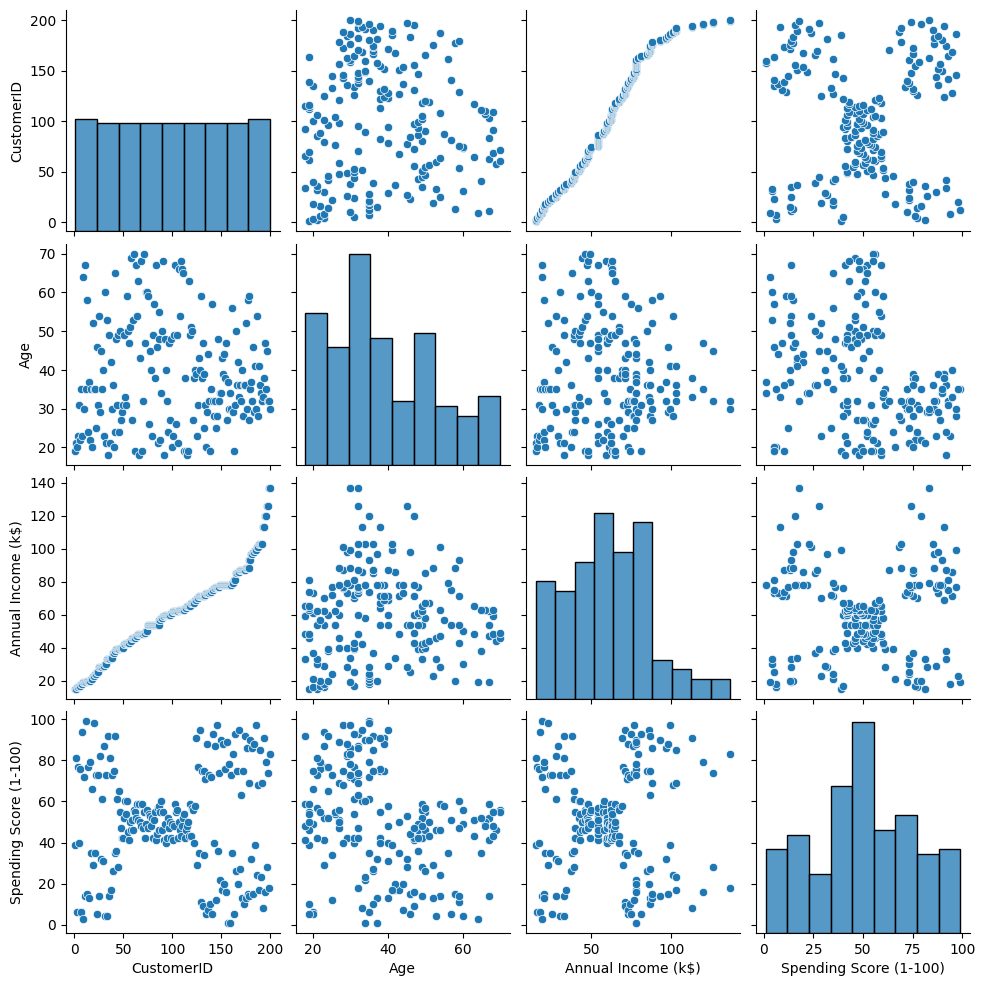

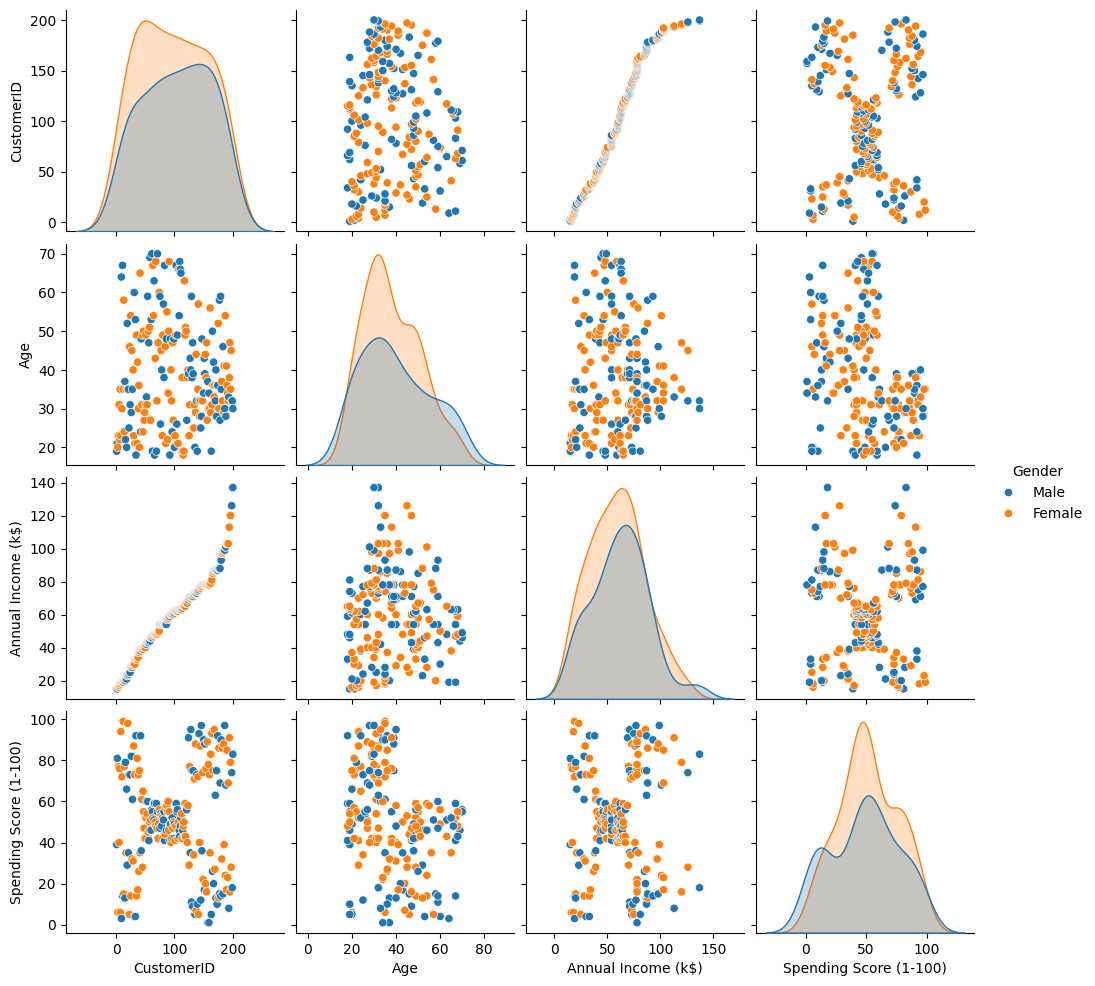

Gender
Female    112
Male       88
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

sns.pairplot(df, hue = 'Gender')
plt.show()


print(df['Gender'].value_counts())

Questão 1) Visualize o scatteplot em matriz com hue = “Gender”. Dá para notar alguma
diferença? Se sim, qual e por quê?

Inicialmente, é notório que a distribuição dos dados (em linhas gerais) permanece a mesma entre os dois gráficos; sendo a única diferença entre eles o fato de que no segundo conjunto é possível observar a dispersão dos dados conforme o genêro dos consultados.

Em uma primeira análise, é claramente visível que a grande parte dos indíviduos consultados são do genêro feminino. Olhando para cada coluna, é possível afirmar que as mulheres entrevistadas possuem uma idade maior e são relativamente mais propensas a gastar quando comparadas aos homens. Por fim, no que diz respeito a "Renda anual" ambos os genêros apresentam uma distribuição parecida, contudo, as mulheres, assim como nas outras colunas, ainda apresentam indíviduas com os maiores indíces salariais dessa pesquisa.

Criando um dataframe somente com as colunas Annual income and Spending Score


In [ ]:
new_df = df[['Annual Income (k$)','Spending Score (1-100)']]
display(new_df)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Instalando o K-means

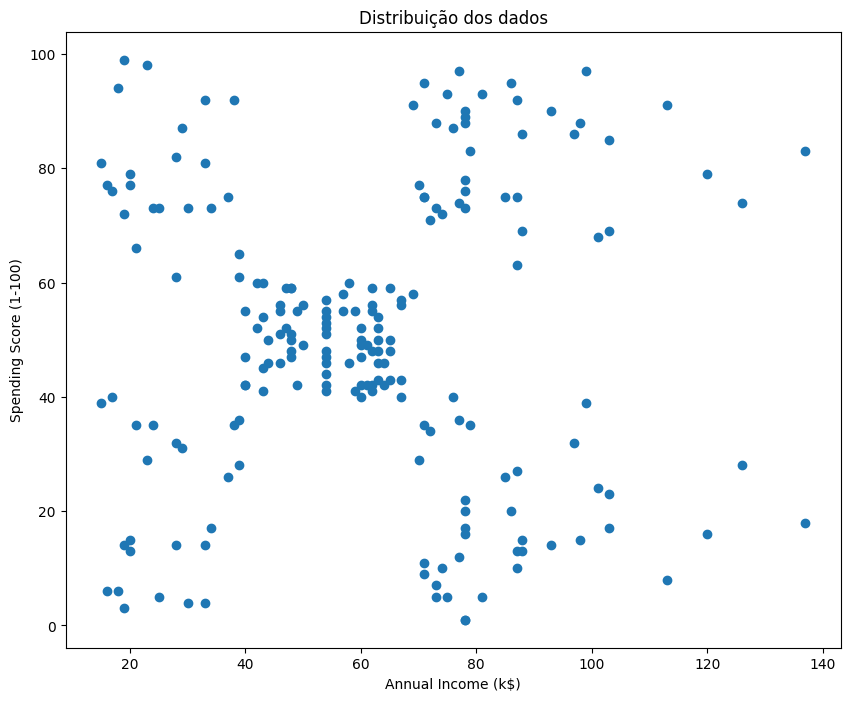

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


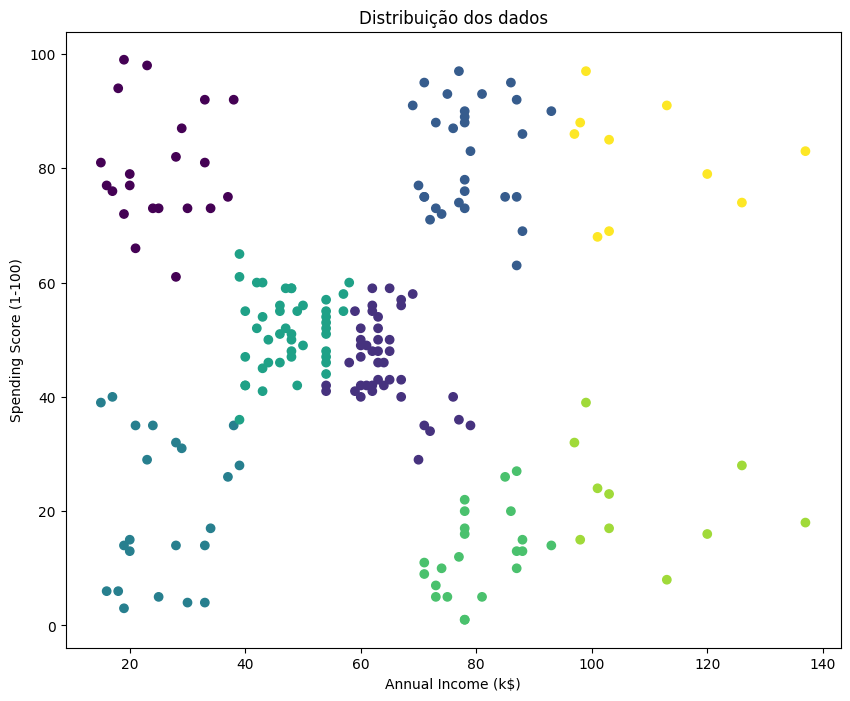

In [ ]:
from sklearn.cluster import KMeans
#Visualização da distribuição antes do Kmeans
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'])
ax.set_title('Distribuição dos dados')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.show()

kmeans = KMeans()
kmeans.fit_predict(new_df)

#Visualização da distribuição depois do Kmeans
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], c=kmeans.labels_)
ax.set_title('Distribuição dos dados')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.show()

Criando a curva de cotovelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

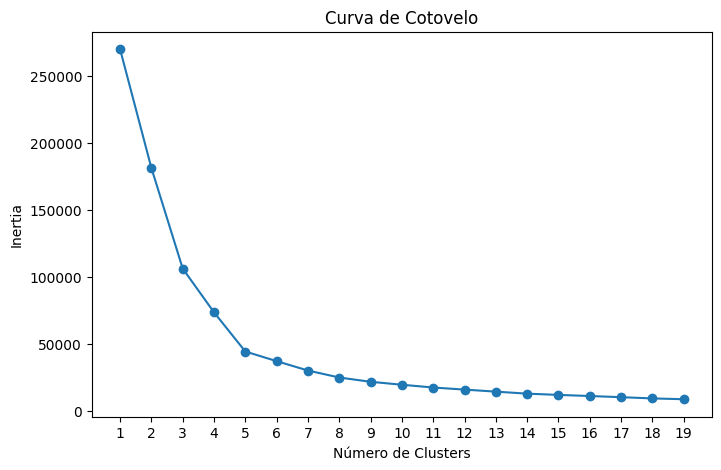

In [ ]:
sse = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X=new_df)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Curva de Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(False)
plt.show()

Descobrindo a quantidade ótima de clusters

In [ ]:
def optimal_number_of_clusters(sse):
    x1, y1 = 2, sse[0]
    x2, y2 = 20, sse[len(sse)-1]

    distances = []
    for i in range(len(sse)):
        x0 = i+2
        y0 = sse[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

print(optimal_number_of_clusters(sse))

6


Questão 2) Crie uma curva de cotovelo. Qual seria o número ideal de clusters?

Após a visualização da curva de cotovelo e da obtenção da distância entre um ponto (xo,yo) e uma reta que passa pelos pontos P1 e P2 (nesse caso, ponto inicial e final) (conforme equação abaixo) obteve-se que a quantidade ideal de clusters seriam 6 clusters.

$$
{distance}(P_1, P_2, (x_0, y_0)) = \frac{|(y_2-y_1)x_0-(x_2-x_1)y_0+x_2 y_1-y_2 x_1|}{\sqrt{(y_2-y_1)^2+(x_2-x_1)^2}}
$$



Criando o cluster com o número de clusters ajustado

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


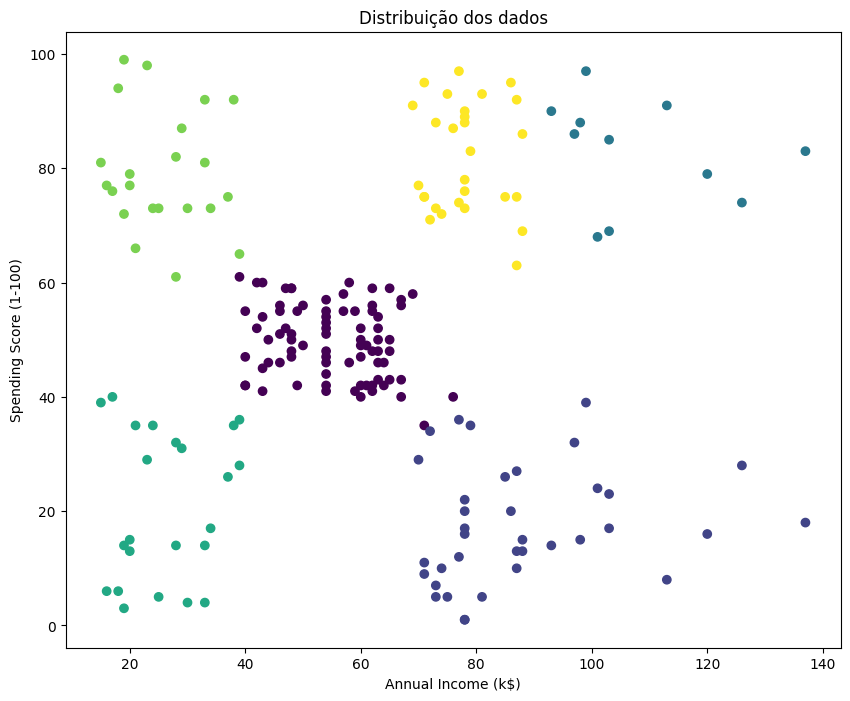

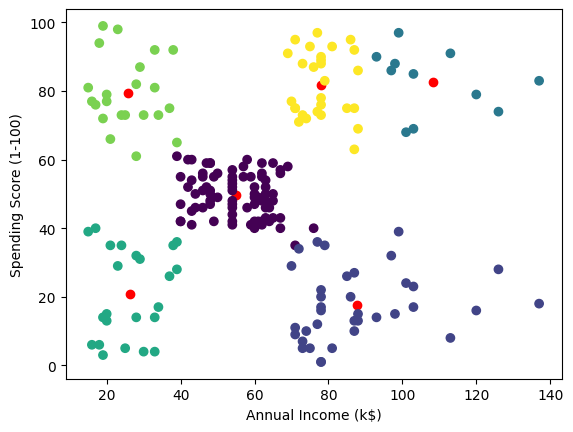

[[ 55.0875      49.7125    ]
 [ 87.75        17.58333333]
 [108.18181818  82.72727273]
 [ 26.30434783  20.91304348]
 [ 25.72727273  79.36363636]
 [ 78.03571429  81.89285714]]


In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit_predict(new_df)

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], c=kmeans.labels_)
ax.set_title('Distribuição dos dados')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.show()


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.scatter(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], c=kmeans.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

print(centroids)

Questão 3) Analise o resultado. Pra qual grupo você direcionaria com maior prioridade a
campanha de marketing?

Para descobrir qual grupo teria a maior prioridade da campanha de marketing, é necessário observar cada um dos 6 centroids e definir qual seria a estratégia a ser adotada a partir de uma análise individual de cada um deles.

1o Centroid:
 [55.0875   ,   49.7125    ]

 Aqui observa-se um grupo com uma renda anual moderada (55k$) e um score de gastos moderado (aproximadamente 50), denota-se um grupo bastante equilibrado, que poderia aderir à campanhas promocionais de produtos a um preço médio de mercado.

 2o Centroid:
 [ 87.75     ,   17.58333333]

 Nesse cenário, observa-se um grupo com uma alta renda anual (87.75), porém, muito restrito a gastos (17.6), a aderência desse grupo por parte de campanhas promocionais é remota, descartando sua presença no grupo de alta prioridade.

 3o Centroid:
  [108.18181818 , 82.72727273]

  Aqui, temos o grupo que deve ser a maior prioridade de alcance da campanha de marketing, haja vista que, possui uma alta renda anual e é bastante propenso a gastos.

  4o Centroid:
  [ 26.30434783 , 20.91304348]

  Nota-se um grupo com baixa renda anual e nada propenso a gastos. Nesse contexto, assim como o segundo grupo, não deve ser considerado como alta prioridade da campanha.

  5o Centroid:
  [ 25.72727273  79.36363636]

  Assim como no terceiro grupo, este grupo deve ser uma prioridade considerável da campanha de marketing. Entretanto, as estratégias de aderência devem ser distintas das que serão adotadas para o outro conjunto, haja vista o grande contraste das duas rendas anuais.

  6o Centroid:
  [ 78.03571429  81.89285714]

  Por fim, este grupo deve ser tido como uma alta prioridade da campanha. Pois possui uma renda anual de moderada para alta e um alto score de propensão a gastos.


  Conforme os dados colhidos, a ordem de prioridade estratégica da campanha de marketing deve ser:

  Grupo 1 (Prioridade alta):Clientes-alvo


  Cluster 3 e Cluster 6


  Grupo 2 (Prioridade média):


  Cluster 1 e Cluster 5


  Grupo 3 (Prioridade baixa):

  
  Cluster 2 e Cluster 4

  Sendo os integrantes do Grupo 1 aqueles que devem ter maior direcionamento da campanha.



